In [73]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
load_digits().keys()

dict_keys(['data', 'images', 'target_names', 'target', 'DESCR'])

In [58]:
data = load_digits().data
images = load_digits().images
targetNames = load_digits().target_names
target = load_digits().target

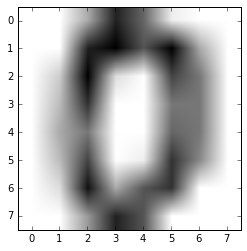

In [50]:
fi = images[0]
plt.imshow(fi, cmap="gray_r")

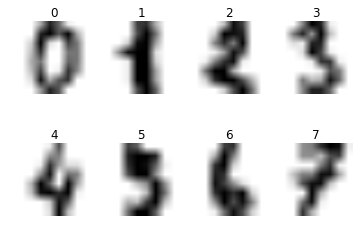

In [54]:
plotImages = [0, 99, 199, 299, 999, 1099, 1199, 1299]

for i in range(len(plotImages)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap="gray_r")
    plt.title(target[i])
    plt.axis("off")

In [83]:
data = pd.DataFrame(data)
targets = pd.Series(target)

In [67]:
trainFeatures, testFeatures = train_test_split(data, test_size=0.2)
trainLabels, testLabels = train_test_split(targets, test_size=0.2)

In [70]:
def train(neighbours, trainFeatures, trainLabels):
    model = KNeighboursClassifier(n_neighbours=neighbours)
    model.fit(trainFeatures, trainLabels)
    return model

In [72]:
def test(model, testFeatures, testLabels):
    predictions = model.predict(testFeatures)
    return accuracy_score(predictions, testLabels)

In [92]:
def crossValidate(neighbour):
    accuracies = []
    kfold = KFold(n_splits=4)
    for trainIndex, testIndex in kfold.split(data):
        trainFeatures, testFeatures = data.loc[trainIndex], data.loc[testIndex]
        trainLabels, testLabels = target.loc[trainIndex], data.loc[testIndex]
        model = train(neighbours, trainFeatures, trainLabels)
        accuracy = test(model, testFeatures, testLabels)
        accuracies.append(accuracy)
    return accuracies
    

In [95]:
neighbours = np.arange(1, 11)
accuracies = []

for neighbour in neighbours:
    accuracy = crossValidate(neighbour)
    meanAccuracy = np.mean(accuracy)
    accuracies.append(meanAccuracy)
    
plt.plot(neighbours, accuracies)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [90]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0
